In [1]:
import pickle
import json
import pathlib
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('../src')
from loss import zero_one_loss, log_loss, topk_loss

In [2]:
with open('../config.json') as f:
    config = json.load(f)
dn0 = pathlib.Path(config['dir'])

In [3]:
def load_train(data, nets, loss_fn):
    dn = dn0.joinpath('Sec6/preds').joinpath(data)
    if loss_fn == 'zo':
        loss_fn = zero_one_loss
    elif loss_fn == 'log':
        loss_fn = log_loss
    elif loss_fn == 'top5':
        loss_fn = lambda p: topk_loss(p, k=5)
    Lte = []
    for net in nets:
        fn = dn.joinpath('%s.pkl' % (net,))
        with open(str(fn), 'rb') as f:
            yte, pte, _ = pickle.load(f)
        L = loss_fn(pte)
        Lte.append(np.mean(np.array([L[i, c] for i, c in enumerate(yte)])))
    return np.array(Lte)

In [4]:
def load_file(data, method, loss_fn):
    dn = dn0.joinpath('Sec6/res/%s/%s' % (data, loss_fn))
    fn = dn.joinpath('%s.pkl' % (method,))
    with open(str(fn), 'rb') as f:
        res = pickle.load(f)
    return res

def load_success(data, method, loss_fn):
    res = load_file(data, method, loss_fn)
    return res['success']

def load_qnum(data, method, loss_fn):
    res = load_file(data, method, loss_fn)
    return res['q_num']

In [5]:
def show_Lavg(data, nets, loss_fn):
    Lte = load_train(data, nets, loss_fn)

def plot_success(data, methods, nets, loss_fn):
    for key, (method, _, cc) in methods.items():
        s = load_success(data, key, loss_fn)
        x = range(len(s))
        plt.plot(x, s, color=cc, label=method)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

def plot_qnum(data, methods, nets, loss_fn):
    q, cl = [], []
    for key, (_, _, cc) in methods.items():
        q.append(load_qnum(data, key, loss_fn))
        cl.append(cc)
    q = np.array(q)
    plt.hist(q.T, bins=np.linspace(0, 1000, 11), color=cl, alpha=0.7)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

## Section 6

In [6]:
# settings
data = ['mat', 'thr', 'top']
nets = ['AlexNet', 'ConvNeXt', 'EfficientNet', 'InceptionV3', 'ResNet', 'SwinTransformer', 'VGG', 'VisionTransformer', 'WideResNet']
methods = {'uniform':('Uniform', (179/255, 207/255, 242/255), (2/255, 95/255, 213/255)),
            'sawade':('Sawade', (242/255, 207/255, 179/255), (213/255, 95/255, 2/255)),
            'proposed':('Proposed', (179/255, 226/255, 213/255), (2/255, 158/255, 115/255))}
loss_fn = ['zo', 'top5', 'log']

In [7]:
# model losses
for d in data:
    for l in loss_fn:
        Lte = load_train(d, nets, l)
        print(d, l, Lte)

mat zo [0.5884 0.2636 0.3279 0.443  0.336  0.2788 0.4278 0.3088 0.3365]
mat top5 [0.3474 0.0852 0.1325 0.2177 0.132  0.0957 0.1944 0.1117 0.1316]
mat log [2.86354373 1.35511061 1.82925853 2.97847478 1.52628298 1.30728435
 1.88782567 1.42692035 1.53847421]
thr zo [0.5078 0.1888 0.2456 0.3474 0.2477 0.2004 0.3324 0.2268 0.2463]
thr top5 [0.2598 0.0354 0.0687 0.134  0.0658 0.0406 0.1151 0.055  0.066 ]
thr log [2.23635487 0.98294481 1.38605995 2.10421815 0.97166509 0.85408138
 1.30491143 0.97303366 0.9985511 ]
top zo [0.442  0.1523 0.1938 0.2817 0.1957 0.1575 0.2714 0.182  0.1974]
top top5 [0.1966 0.0216 0.0427 0.0937 0.0407 0.0272 0.0795 0.0344 0.0407]
top log [1.8322845  0.82295633 1.16065208 1.57057074 0.71134642 0.67334381
 0.99725919 0.76475925 0.74298089]


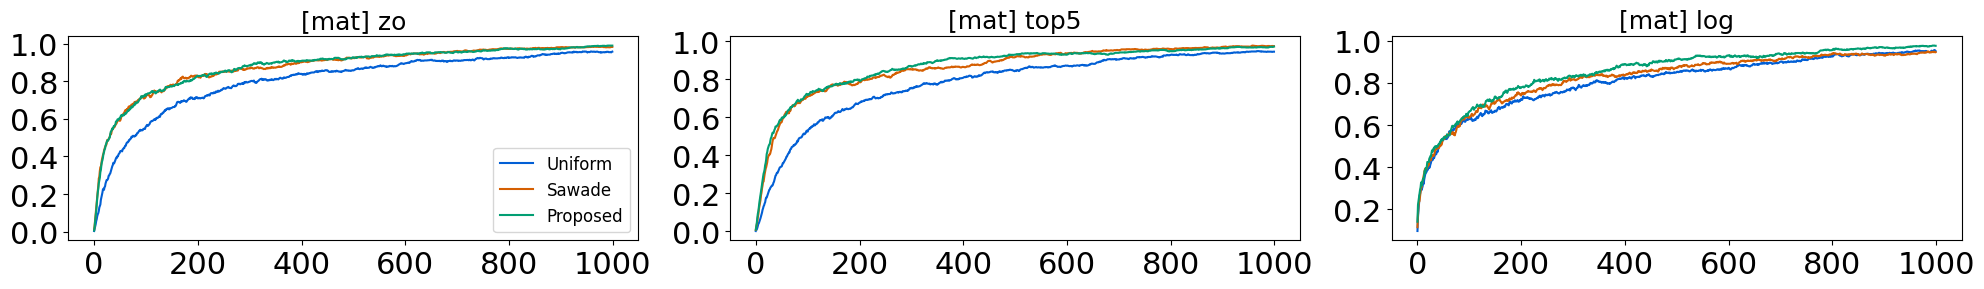

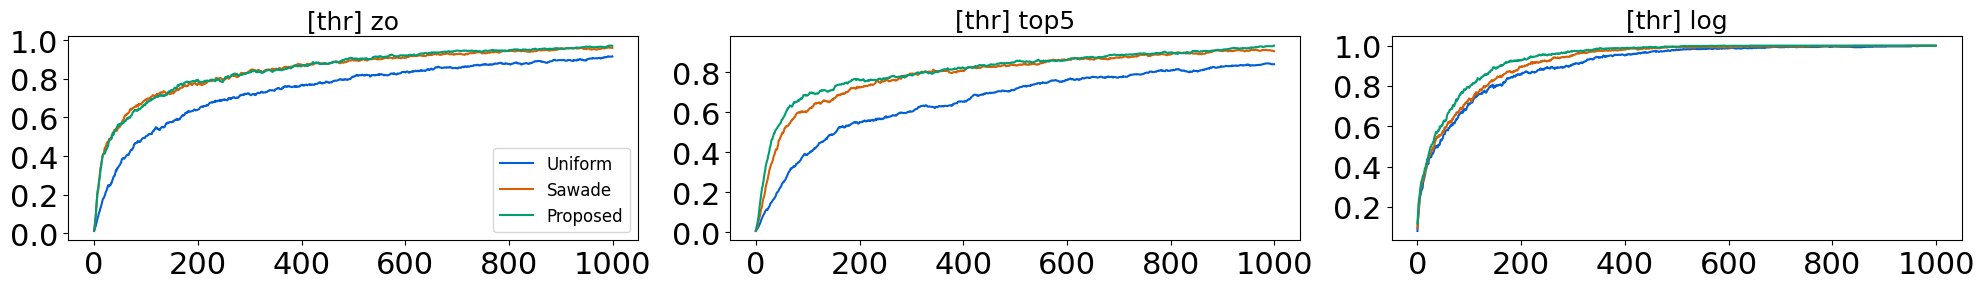

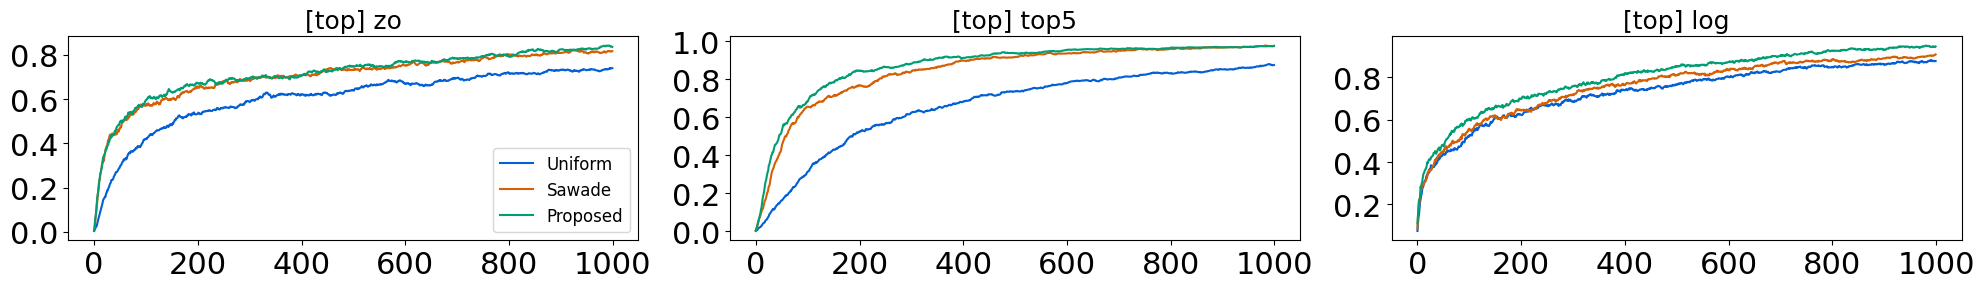

In [8]:
for d in data:
    plt.figure(figsize=(20, 3))
    for i, l in enumerate(loss_fn):
        plt.subplot(1, len(loss_fn), i+1)
        plot_success(d, methods, nets, l)
        plt.title('[%s] %s' % (d, l), fontsize=18)
        if i == 0:
            plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

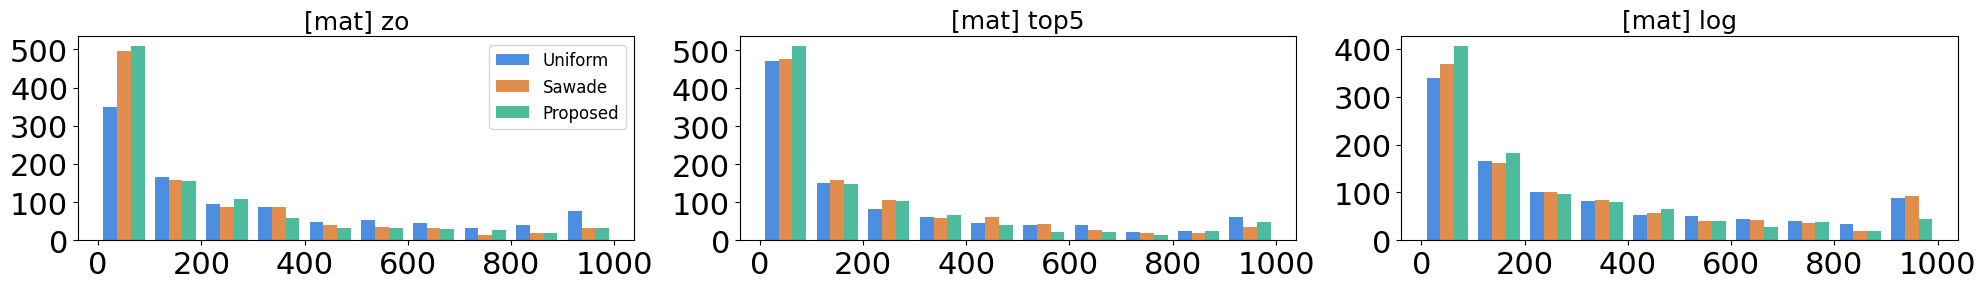

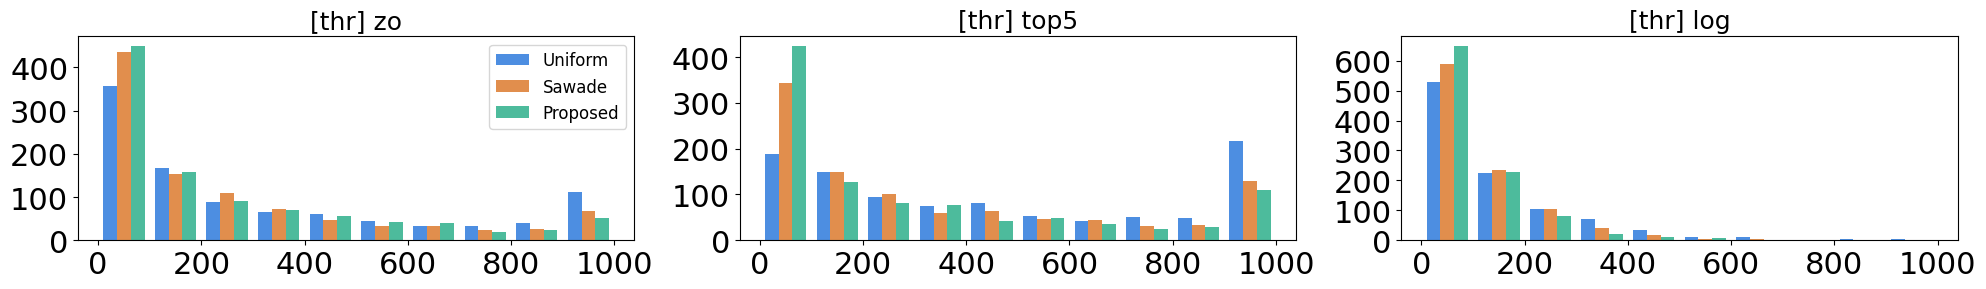

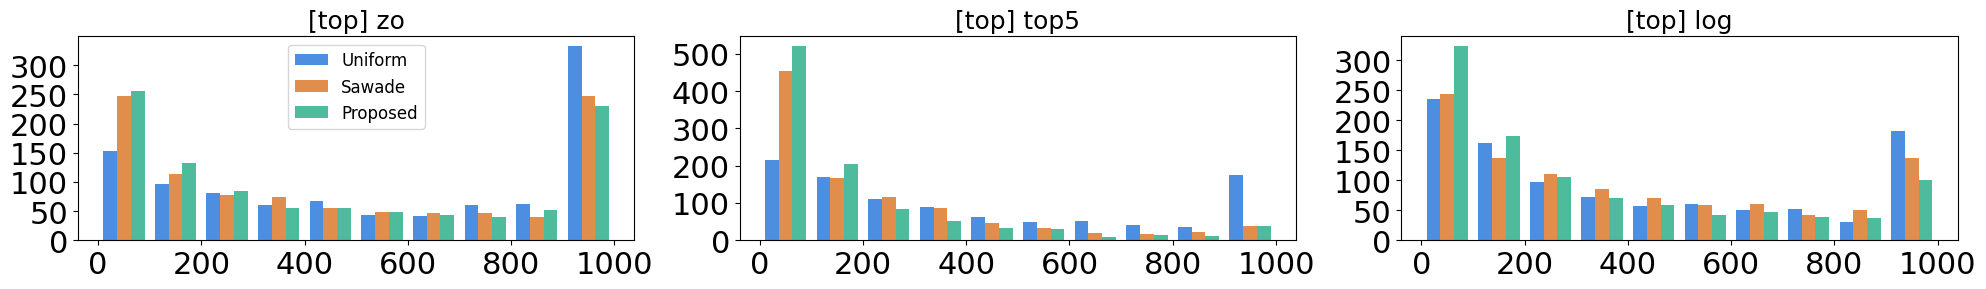

In [9]:
for d in data:
    plt.figure(figsize=(20, 3))
    for i, l in enumerate(loss_fn):
        plt.subplot(1, len(loss_fn), i+1)
        plot_qnum(d, methods, nets, l)
        plt.title('[%s] %s' % (d, l), fontsize=18)
        if i == 0:
            plt.legend([methods[key][0] for key in methods.keys()], fontsize=12)
    plt.tight_layout()
    plt.show()